In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("seaborn-v0_8")


In [ ]:
DATA_PATH = "/content/drive/MyDrive/uidai_hackathon/data/processed/lifecycle_aggregated.csv"
FIG_PATH = "/content/drive/MyDrive/uidai_hackathon/figures/final"

df = pd.read_csv(DATA_PATH, parse_dates=["date"])
df.head()


,date,state,district_x,pincode_x,age_0_5,age_5_17,age_18_greater,district_y,pincode_y,demo_age_5_17,demo_age_17_,district,pincode,bio_age_5_17,bio_age_17_,total_enrolment,demographic_updates,biometric_updates,DUI,BUBI
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,0,0.0,0.0,0.0,0,0.0,0.0,0.0,109,0.0,0.0,0.0,0.0
1,2025-03-09,Bihar,SitamarhiSitamarhiPurbi ChamparanSitamarhiSita...,6723137,206,633,166,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1005,0.0,0.0,0.0,0.0
2,2025-03-09,Delhi,West DelhiWest Delhi,220077,122,53,57,0,0.0,0.0,0.0,0,0.0,0.0,0.0,232,0.0,0.0,0.0,0.0
3,2025-03-09,Haryana,FaridabadGurugram,243005,98,79,23,0,0.0,0.0,0.0,0,0.0,0.0,0.0,200,0.0,0.0,0.0,0.0
4,2025-03-09,Karnataka,Bengaluru UrbanBengaluru UrbanBengaluru UrbanB...,2240159,63,80,105,0,0.0,0.0,0.0,0,0.0,0.0,0.0,248,0.0,0.0,0.0,0.0


In [ ]:
state_summary = (
    df.groupby("state")
    .agg(
        avg_enrolment=("total_enrolment", "mean"),
        avg_dui=("DUI", "mean"),
        avg_bubi=("BUBI", "mean")
    )
    .reset_index()
)

state_summary.head()


,state,avg_enrolment,avg_dui,avg_bubi
0,100000,10.380952,0.000000,0.000000
1,Andaman & Nicobar Islands,2.280000,5.365000,2.550000
2,Andaman and Nicobar Islands,6.107692,10.967518,25.143275
3,Andhra Pradesh,1557.085366,22.486865,90.250368
4,Arunachal Pradesh,55.692308,6.869670,16.680961


In [ ]:
enrol_thresh = state_summary["avg_enrolment"].quantile(0.25)
update_thresh = state_summary["avg_bubi"].quantile(0.75)

state_summary["high_lifecycle_pressure"] = (
    (state_summary["avg_enrolment"] < enrol_thresh) &
    (state_summary["avg_bubi"] > update_thresh)
)

high_pressure_states = state_summary[
    state_summary["high_lifecycle_pressure"]
]

high_pressure_states


,state,avg_enrolment,avg_dui,avg_bubi,high_lifecycle_pressure


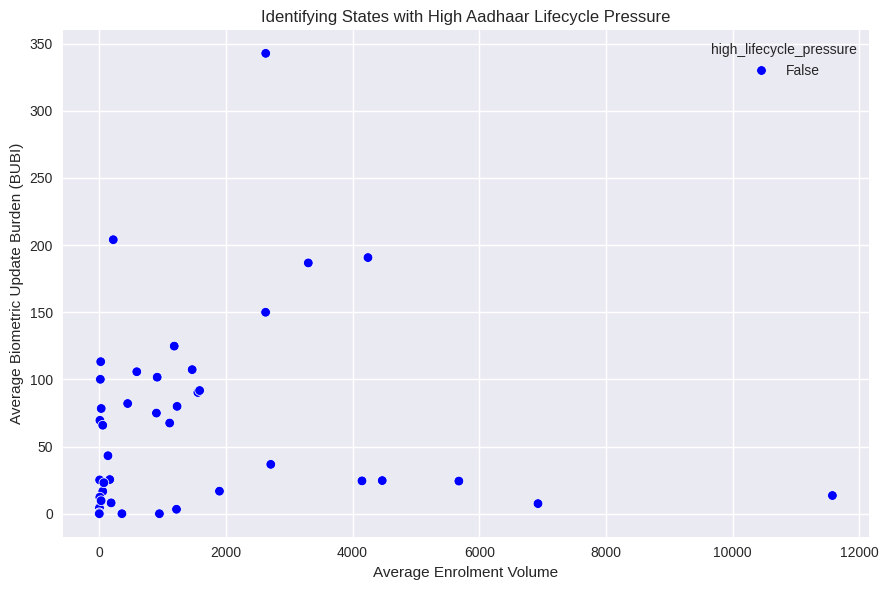

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(
    data=state_summary,
    x="avg_enrolment",
    y="avg_bubi",
    hue="high_lifecycle_pressure",
    palette={True: "red", False: "blue"}
)

plt.xlabel("Average Enrolment Volume")
plt.ylabel("Average Biometric Update Burden (BUBI)")
plt.title("Identifying States with High Aadhaar Lifecycle Pressure")
plt.tight_layout()
plt.savefig(f"{FIG_PATH}/lifecycle_pressure_scatter.png", dpi=300)
plt.show()


In [ ]:
state_summary["lifecycle_pressure_score"] = (
    0.5 * state_summary["avg_dui"] +
    0.5 * state_summary["avg_bubi"]
)

priority_states = state_summary.sort_values(
    "lifecycle_pressure_score", ascending=False
).head(10)

priority_states


,state,avg_enrolment,avg_dui,avg_bubi,high_lifecycle_pressure,lifecycle_pressure_score
41,Tamil Nadu,2628.440476,42.796104,342.738725,False,192.767414
23,Karnataka,2626.294118,96.979338,149.972172,False,123.475755
28,Maharashtra,4242.977011,55.895027,190.711105,False,123.303066
16,Gujarat,3300.576471,29.703842,186.708800,False,108.206321
18,Himachal Pradesh,221.341772,7.624592,204.006332,False,105.815462
17,Haryana,1183.759036,16.554264,124.771535,False,70.662900
24,Kerala,914.658537,21.287775,101.636543,False,61.462159
37,Puducherry,23.266667,9.333357,113.184286,False,61.258821
21,Jammu and Kashmir,592.481481,11.156466,105.707553,False,58.432009
34,Odisha,1467.123457,8.399824,107.276377,False,57.838101


In [ ]:
priority_states.to_csv(
    "/content/drive/MyDrive/uidai_hackathon/priority_states.csv",
    index=False
)


In [ ]:
os.listdir(FIG_PATH)


['national_enrolment_trend.png',
 'agewise_enrolment_trend.png',
 'top10_states_enrolment.png',
 'top10_states_dui.png',
 'top10_states_bubi.png',
 'dui_vs_bubi_scatter.png',
 'lifecycle_pressure_scatter.png']

In [ ]:
import pandas as pd

df = pd.read_csv(
    "/content/drive/MyDrive/uidai_hackathon/data/processed/lifecycle_aggregated.csv",
    parse_dates=["date"]
)

df.head()


,date,state,district_x,pincode_x,age_0_5,age_5_17,age_18_greater,district_y,pincode_y,demo_age_5_17,demo_age_17_,district,pincode,bio_age_5_17,bio_age_17_,total_enrolment,demographic_updates,biometric_updates,DUI,BUBI
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,0,0.0,0.0,0.0,0,0.0,0.0,0.0,109,0.0,0.0,0.0,0.0
1,2025-03-09,Bihar,SitamarhiSitamarhiPurbi ChamparanSitamarhiSita...,6723137,206,633,166,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1005,0.0,0.0,0.0,0.0
2,2025-03-09,Delhi,West DelhiWest Delhi,220077,122,53,57,0,0.0,0.0,0.0,0,0.0,0.0,0.0,232,0.0,0.0,0.0,0.0
3,2025-03-09,Haryana,FaridabadGurugram,243005,98,79,23,0,0.0,0.0,0.0,0,0.0,0.0,0.0,200,0.0,0.0,0.0,0.0
4,2025-03-09,Karnataka,Bengaluru UrbanBengaluru UrbanBengaluru UrbanB...,2240159,63,80,105,0,0.0,0.0,0.0,0,0.0,0.0,0.0,248,0.0,0.0,0.0,0.0


In [ ]:
import os

os.path.exists(
    "/content/drive/MyDrive/uidai_hackathon/data/processed/lifecycle_aggregated.csv"
)


True